In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('insurance.csv')

In [23]:
df.shape

(1338, 7)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

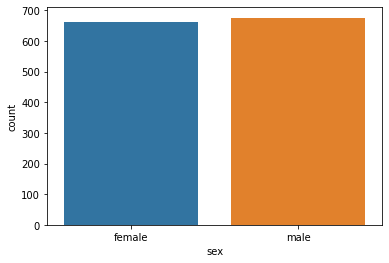

In [27]:
sns.countplot(data=df, x='sex')

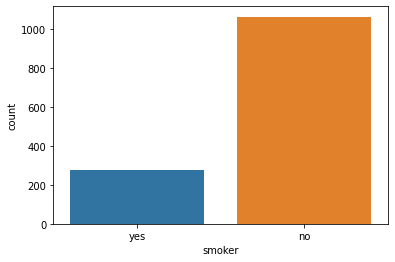

In [28]:
sns.countplot(data=df, x='smoker')

In [33]:
df['sex']=df.sex.map(dict(male=1, female=0))

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [36]:
df['smoker']=df.smoker.map(dict(yes=1, no=0))

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


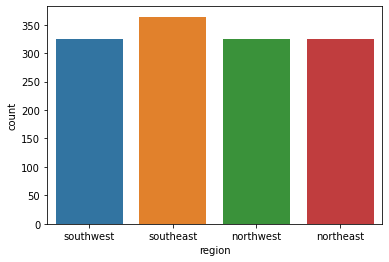

In [39]:
sns.countplot(data=df, x='region')

In [40]:
dic={'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}

In [41]:
df['region']=df['region'].map(dic)

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


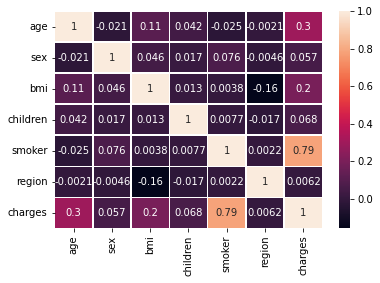

In [43]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

In [44]:
df.drop(labels='region', axis=1, inplace=True)

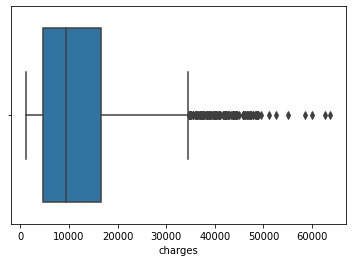

In [45]:
sns.boxplot(x=df['charges'])

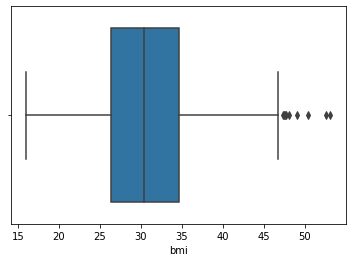

In [50]:
sns.boxplot(x=df['bmi'])

In [51]:
y=list(df['charges'])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(df, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(1070, 6)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [57]:
lin_reg=LinearRegression()

In [58]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred=lin_reg.predict(X_test)

In [60]:
r2_score(y_test, y_pred)

1.0